In [83]:
import pandas as pd
import numpy as np
import sklearn as skl
import os.path as osp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats



In [13]:
#If positive then Home team won if negative then home team lost 
df = pd.read_csv('nba_games.csv',index_col=0)

In [14]:
df

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,240.0,38.0,72.0,0.528,16.0,37.0,0.432,18.0,21.0,...,26.2,26.8,155.0,123.0,MIA,107,1,2023,2022-11-07,True
1,240.0,240.0,40.0,84.0,0.476,14.0,39.0,0.359,13.0,15.0,...,41.0,37.3,160.0,121.0,POR,110,0,2023,2022-11-07,False
2,240.0,240.0,41.0,78.0,0.526,8.0,24.0,0.333,15.0,19.0,...,28.6,41.1,250.0,125.0,DAL,90,1,2023,2022-12-14,True
3,240.0,240.0,29.0,74.0,0.392,13.0,38.0,0.342,19.0,26.0,...,12.6,33.0,183.0,110.0,CLE,105,0,2023,2022-12-14,False
4,240.0,240.0,37.0,87.0,0.425,7.0,33.0,0.212,32.0,35.0,...,20.0,32.3,226.0,117.0,TOR,126,1,2023,2022-12-07,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17711,240.0,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,36.0,...,34.2,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True
17712,240.0,240.0,37.0,74.0,0.500,13.0,25.0,0.520,26.0,37.0,...,25.0,30.0,139.0,129.0,ORL,108,1,2017,2016-12-14,True
17713,240.0,240.0,42.0,89.0,0.472,14.0,33.0,0.424,10.0,20.0,...,25.6,29.9,175.0,126.0,LAC,113,0,2017,2016-12-14,False
17714,240.0,240.0,41.0,85.0,0.482,9.0,26.0,0.346,26.0,30.0,...,27.7,27.1,150.0,126.0,MIA,106,1,2020,2020-09-19,True


In [15]:
df = df.sort_values('date')

In [16]:
df = df.reset_index(drop=True)

In [17]:
del df['mp.1']
del df['mp_opp.1']
del df['index_opp']

In [18]:
def add_target(group):
    group["target"] = group["won"].shift(-1)
    return group

df = df.groupby("team", group_keys=False).apply(add_target)

In [19]:
df[df['team']=='WAS']

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
29,240.0,40.0,94.0,0.426,6.0,20.0,0.300,13.0,18.0,0.722,...,31.7,200.0,106.0,ATL,114,1,2017,2016-10-27,False,False
75,265.0,38.0,86.0,0.442,5.0,25.0,0.200,22.0,25.0,0.880,...,39.2,221.0,111.0,MEM,112,1,2017,2016-10-30,False,False
123,240.0,42.0,72.0,0.583,3.0,10.0,0.300,16.0,24.0,0.667,...,39.9,157.0,116.0,TOR,113,0,2017,2016-11-02,False,True
138,240.0,31.0,80.0,0.388,5.0,20.0,0.250,28.0,35.0,0.800,...,29.9,150.0,104.0,ATL,92,0,2017,2016-11-04,True,False
170,240.0,34.0,86.0,0.395,6.0,17.0,0.353,12.0,17.0,0.706,...,30.4,133.0,110.0,ORL,88,1,2017,2016-11-05,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,240.0,39.0,79.0,0.494,16.0,37.0,0.432,15.0,18.0,0.833,...,31.2,192.0,120.0,NYK,118,1,2023,2023-04-02,False,False
17448,240.0,50.0,99.0,0.505,13.0,27.0,0.481,15.0,21.0,0.714,...,37.5,208.0,126.0,MIL,140,0,2023,2023-04-04,False,False
17468,240.0,45.0,94.0,0.479,6.0,28.0,0.214,20.0,26.0,0.769,...,40.6,206.0,121.0,ATL,134,1,2023,2023-04-05,False,True
17495,240.0,39.0,84.0,0.464,7.0,33.0,0.212,29.0,37.0,0.784,...,44.5,149.0,117.0,MIA,108,0,2023,2023-04-07,True,False


In [20]:
df['target'][pd.isnull(df['target'])] = 2

C:\Users\JOSECH~1\AppData\Local\Temp/ipykernel_27352/3405584470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][pd.isnull(df['target'])] = 2


In [21]:
df['target'] = df['target'].astype(int, errors = 'ignore')

In [22]:
df['won'].value_counts()

True     8858
False    8858
Name: won, dtype: int64

In [23]:
df['target'].value_counts()

0    8844
1    8842
2      30
Name: target, dtype: int64

In [24]:
nulls = pd.isnull(df)

In [25]:
nulls = nulls.sum()

In [26]:
nulls = nulls[nulls>0]

In [27]:
valid_columns = df.columns[~df.columns.isin(nulls.index)]

In [28]:
valid_columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [29]:
df = df[valid_columns].copy()

In [30]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,240.0,39.0,75.0,0.520,13.0,19.0,0.684,22.0,22.0,1.000,...,29.7,150.0,133.0,UTA,104,0,2017,2016-10-25,True,0
1,240.0,32.0,87.0,0.368,9.0,27.0,0.333,15.0,20.0,0.750,...,36.8,200.0,101.0,CLE,117,1,2017,2016-10-25,False,1
2,240.0,40.0,82.0,0.488,8.0,24.0,0.333,16.0,16.0,1.000,...,39.2,220.0,120.0,POR,113,1,2017,2016-10-25,False,1
3,240.0,40.0,85.0,0.471,7.0,33.0,0.212,13.0,18.0,0.722,...,36.2,263.0,112.0,SAS,129,0,2017,2016-10-25,False,1
4,240.0,45.0,94.0,0.479,13.0,35.0,0.371,14.0,19.0,0.737,...,36.8,153.0,125.0,NYK,88,0,2017,2016-10-25,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17711,240.0,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,...,95.2,134.0,129.0,MIA,94,1,2023,2023-06-07,True,1
17712,240.0,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,...,32.6,164.0,114.0,DEN,108,0,2023,2023-06-09,False,0
17713,240.0,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,...,30.3,223.0,127.0,MIA,95,1,2023,2023-06-09,True,1
17714,240.0,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,...,42.5,102.0,109.0,MIA,89,0,2023,2023-06-12,True,2


In [31]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression


rr = RidgeClassifier(alpha=1)
split = TimeSeriesSplit(n_splits = 3)

sfs = SequentialFeatureSelector(rr, n_features_to_select=30, direction= 'forward',cv=split)

In [32]:
removed_columns = ['season','date','won','target','team','team_opp']

In [33]:
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [35]:
sfs.fit(df[selected_columns], df["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30)

In [36]:
predictors = list(selected_columns[sfs.get_support()])

In [37]:
predictors

['fga',
 'trb%',
 'usg%',
 'fg_max',
 'ft%_max',
 'orb_max',
 'drb_max',
 'blk_max',
 'gmsc_max',
 'drb%_max',
 'trb%_max',
 'stl%_max',
 'tov%_max',
 'stl_opp',
 'pts_opp',
 'trb%_opp',
 'ast%_opp',
 'stl%_opp',
 'usg%_opp',
 'ft_max_opp',
 'ft%_max_opp',
 'trb_max_opp',
 'pts_max_opp',
 'gmsc_max_opp',
 'orb%_max_opp',
 'trb%_max_opp',
 'ast%_max_opp',
 'stl%_max_opp',
 'usg%_max_opp',
 'total_opp']

In [38]:
def backtest(data, model, predictors, start=2, step=1):
    all_predictions = []
    
    seasons = sorted(data["season"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["season"] < season]
        test = data[data["season"] == season]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [39]:
predictions = backtest(df, rr, predictors)

In [40]:
predictions

,actual,prediction
5230,0,0
5231,1,1
5232,1,1
5233,0,1
5234,0,0
...,...,...
17711,1,1
17712,0,0
17713,1,1
17714,2,1


In [41]:
predictions = predictions[predictions['actual']!=2]
accuracy_score(predictions['actual'],predictions['prediction'])

0.5359666024405909

In [42]:
df.groupby('home').apply(lambda x: x[x['won']==1].shape[0]/x.shape[0])

home
0.0    0.430684
1.0    0.569316
dtype: float64

In [43]:
df_rolling = df[list(selected_columns) + ["won", "team","season"]]

def find_team_averages(team):
    rolling = team[selected_columns].rolling(10).mean()
    return rolling

df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_averages)

In [44]:
df_rolling

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17711,0.0,0.500000,0.347761,0.576794,0.357143,0.346032,0.407605,0.418605,0.352381,0.785998,...,0.285636,0.338417,0.0461,0.0710,0.314361,0.340897,0.382587,0.642353,0.390179,0.5
17712,0.0,0.393182,0.361194,0.439952,0.400000,0.377778,0.433460,0.316279,0.260317,0.829988,...,0.162390,0.397706,0.0452,0.0910,0.262998,0.246154,0.465174,0.535294,0.366071,0.5
17713,0.0,0.475000,0.332836,0.560526,0.382143,0.355556,0.430672,0.416279,0.349206,0.788681,...,0.282785,0.321330,0.0458,0.0883,0.319811,0.340769,0.396517,0.628235,0.359821,0.5
17714,0.0,0.465909,0.331343,0.550478,0.353571,0.357143,0.392395,0.397674,0.341270,0.767095,...,0.317763,0.322592,0.0379,0.0812,0.316038,0.350641,0.344279,0.603529,0.348214,0.5


In [45]:
rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df, df_rolling], axis=1)

In [46]:

df = df.dropna()

In [47]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,trb%_max_opp_10,ast%_max_opp_10,stl%_max_opp_10,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10
239,0.00,0.295455,0.358209,0.313397,0.250000,0.222222,0.415716,0.325581,0.301587,0.708285,...,0.169846,0.335894,0.0633,0.0876,0.420440,0.153846,0.389552,0.440000,0.337500,0.6
241,0.25,0.500000,0.402985,0.526316,0.178571,0.222222,0.295311,0.627907,0.539683,0.766628,...,0.157346,0.335665,0.0614,0.0868,0.341824,0.153462,0.372139,0.443529,0.362500,0.6
244,0.25,0.545455,0.373134,0.607656,0.428571,0.412698,0.432193,0.418605,0.412698,0.654609,...,0.189912,0.279014,0.0717,0.0949,0.301677,0.122436,0.355721,0.458824,0.425893,0.5
255,0.00,0.272727,0.298507,0.330144,0.214286,0.333333,0.249683,0.302326,0.238095,0.854142,...,0.187061,0.310206,0.0567,0.1058,0.310482,0.176923,0.365174,0.452941,0.261607,0.7
257,0.00,0.431818,0.686567,0.251196,0.250000,0.412698,0.239544,0.348837,0.317460,0.722287,...,0.165132,0.278096,0.0609,0.0809,0.343501,0.174103,0.367662,0.388235,0.445536,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17711,0.00,0.454545,0.283582,0.583732,0.142857,0.174603,0.285171,0.488372,0.412698,0.784131,...,0.285636,0.338417,0.0461,0.0710,0.314361,0.340897,0.382587,0.642353,0.390179,0.5
17712,0.00,0.318182,0.253731,0.430622,0.250000,0.285714,0.338403,0.372093,0.301587,0.824971,...,0.162390,0.397706,0.0452,0.0910,0.262998,0.246154,0.465174,0.535294,0.366071,0.5
17713,0.00,0.409091,0.268657,0.538278,0.464286,0.333333,0.566540,0.348837,0.317460,0.722287,...,0.282785,0.321330,0.0458,0.0883,0.319811,0.340769,0.396517,0.628235,0.359821,0.5
17714,0.00,0.386364,0.343284,0.437799,0.142857,0.333333,0.159696,0.279070,0.349206,0.492415,...,0.317763,0.322592,0.0379,0.0812,0.316038,0.350641,0.344279,0.603529,0.348214,0.5


In [48]:
def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

df["home_next"] = add_col(df, "home")
df["team_opp_next"] = add_col(df, "team_opp")
df["date_next"] = add_col(df, "date")

In [49]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,home_next,team_opp_next,date_next
239,0.00,0.295455,0.358209,0.313397,0.250000,0.222222,0.415716,0.325581,0.301587,0.708285,...,0.0876,0.420440,0.153846,0.389552,0.440000,0.337500,0.6,0.0,POR,2016-11-11
241,0.25,0.500000,0.402985,0.526316,0.178571,0.222222,0.295311,0.627907,0.539683,0.766628,...,0.0868,0.341824,0.153462,0.372139,0.443529,0.362500,0.6,1.0,SAS,2016-11-16
244,0.25,0.545455,0.373134,0.607656,0.428571,0.412698,0.432193,0.418605,0.412698,0.654609,...,0.0949,0.301677,0.122436,0.355721,0.458824,0.425893,0.5,1.0,DEN,2016-11-13
255,0.00,0.272727,0.298507,0.330144,0.214286,0.333333,0.249683,0.302326,0.238095,0.854142,...,0.1058,0.310482,0.176923,0.365174,0.452941,0.261607,0.7,0.0,MIA,2016-11-12
257,0.00,0.431818,0.686567,0.251196,0.250000,0.412698,0.239544,0.348837,0.317460,0.722287,...,0.0809,0.343501,0.174103,0.367662,0.388235,0.445536,0.5,0.0,GSW,2016-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17711,0.00,0.454545,0.283582,0.583732,0.142857,0.174603,0.285171,0.488372,0.412698,0.784131,...,0.0710,0.314361,0.340897,0.382587,0.642353,0.390179,0.5,0.0,MIA,2023-06-09
17712,0.00,0.318182,0.253731,0.430622,0.250000,0.285714,0.338403,0.372093,0.301587,0.824971,...,0.0910,0.262998,0.246154,0.465174,0.535294,0.366071,0.5,0.0,DEN,2023-06-12
17713,0.00,0.409091,0.268657,0.538278,0.464286,0.333333,0.566540,0.348837,0.317460,0.722287,...,0.0883,0.319811,0.340769,0.396517,0.628235,0.359821,0.5,1.0,MIA,2023-06-12
17714,0.00,0.386364,0.343284,0.437799,0.142857,0.333333,0.159696,0.279070,0.349206,0.492415,...,0.0812,0.316038,0.350641,0.344279,0.603529,0.348214,0.5,NaN,NaN,NaN


In [50]:
df=df.copy()

In [51]:
full = df.merge(df[rolling_cols + ["team_opp_next", "date_next", "team"]], left_on=["team", "date_next"], right_on=["team_opp_next", "date_next"])

In [52]:
full

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,stl%_max_opp_10_y,blk%_max_opp_10_y,tov%_max_opp_10_y,usg%_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,team_opp_next_y,team_y
0,0.25,0.500000,0.402985,0.526316,0.178571,0.222222,0.295311,0.627907,0.539683,0.766628,...,0.0450,0.0906,0.305765,0.135256,0.294527,0.441176,0.283036,0.4,SAC,SAS
1,0.00,0.568182,0.432836,0.578947,0.107143,0.174603,0.214195,0.209302,0.206349,0.666278,...,0.0822,0.1075,0.357966,0.155128,0.445771,0.437647,0.344643,0.3,DET,OKC
2,0.00,0.409091,0.537313,0.318182,0.142857,0.126984,0.354880,0.511628,0.380952,0.906651,...,0.0626,0.0846,0.291195,0.124487,0.374129,0.442353,0.426786,0.5,CHI,POR
3,0.00,0.340909,0.373134,0.358852,0.178571,0.317460,0.214195,0.465116,0.428571,0.708285,...,0.0484,0.1199,0.418344,0.167051,0.384080,0.405882,0.358036,0.5,IND,ORL
4,0.00,0.272727,0.149254,0.468900,0.250000,0.269841,0.354880,0.558140,0.460317,0.805134,...,0.0738,0.1098,0.357442,0.139359,0.328856,0.415294,0.406250,0.5,LAL,BRK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,0.00,0.386364,0.253731,0.521531,0.571429,0.444444,0.548796,0.395349,0.301587,0.883314,...,0.0459,0.0730,0.355136,0.267051,0.396517,0.635294,0.414286,0.5,MIA,DEN
15714,0.00,0.295455,0.462687,0.241627,0.357143,0.444444,0.330798,0.325581,0.285714,0.753792,...,0.0461,0.0710,0.314361,0.340897,0.382587,0.642353,0.390179,0.5,MIA,DEN
15715,0.00,0.454545,0.283582,0.583732,0.142857,0.174603,0.285171,0.488372,0.412698,0.784131,...,0.0454,0.0872,0.233124,0.245256,0.475124,0.560000,0.373214,0.6,DEN,MIA
15716,0.00,0.318182,0.253731,0.430622,0.250000,0.285714,0.338403,0.372093,0.301587,0.824971,...,0.0458,0.0883,0.319811,0.340769,0.396517,0.628235,0.359821,0.5,MIA,DEN


In [53]:
full[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]

,team_x,team_opp_next_x,team_y,team_opp_next_y,date_next
0,SAC,SAS,SAS,SAC,2016-11-16
1,DET,OKC,OKC,DET,2016-11-14
2,CHI,POR,POR,CHI,2016-11-15
3,IND,ORL,ORL,IND,2016-11-14
4,LAL,BRK,BRK,LAL,2016-11-15
...,...,...,...,...,...
15713,MIA,DEN,DEN,MIA,2023-06-07
15714,MIA,DEN,DEN,MIA,2023-06-09
15715,DEN,MIA,MIA,DEN,2023-06-09
15716,MIA,DEN,DEN,MIA,2023-06-12


In [54]:
removed_columns = list(full.columns[full.dtypes == "object"]) + removed_columns

In [55]:
selected_columns = full.columns[~full.columns.isin(removed_columns)]
sfs.fit(full[selected_columns], full["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30)

In [56]:
predictors = list(selected_columns[sfs.get_support()])


In [57]:
predictions = backtest(full, rr, predictors)


In [58]:
predictors

['mp',
 '3p%',
 'orb',
 'ts%',
 'orb%',
 'usg%',
 'orb_max',
 'stl%_max',
 'mp_opp',
 'stl_opp',
 'drb%_opp',
 'stl%_opp',
 'usg%_opp',
 'orb%_max_opp',
 'ts%_10_x',
 'usg%_10_x',
 'ortg_10_x',
 'drtg_max_10_x',
 'ast_opp_10_x',
 'blk%_opp_10_x',
 'usg%_opp_10_x',
 'ft%_max_opp_10_x',
 'home_next',
 'usg%_10_y',
 'ortg_10_y',
 'ftr_max_10_y',
 'drtg_max_10_y',
 'pf_opp_10_y',
 'usg%_opp_10_y',
 'ft_max_opp_10_y']

In [59]:
accuracy_score(predictions["actual"], predictions["prediction"])


0.6249095513748191

In [60]:
full.to_csv('nba_games2.csv')
full.rename(columns={col: col.replace('%', 'pct') for col in full.columns}, inplace=True)

In [61]:
full = full.rename(columns={'3ppct': 'three_pct'})

In [62]:
full['difference']=full['total']-full['total_opp']
full['difference'] = full['difference'].shift(1)
full = full.dropna(subset=['difference'])


In [63]:
full.head()

,mp,fg,fga,fgpct,3p,3pa,three_pct,ft,fta,ftpct,...,blkpct_max_opp_10_y,tovpct_max_opp_10_y,usgpct_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,team_opp_next_y,team_y,difference
1,0.0,0.568182,0.432836,0.578947,0.107143,0.174603,0.214195,0.209302,0.206349,0.666278,...,0.1075,0.357966,0.155128,0.445771,0.437647,0.344643,0.3,DET,OKC,-0.017857
2,0.0,0.409091,0.537313,0.318182,0.142857,0.126984,0.354880,0.511628,0.380952,0.906651,...,0.0846,0.291195,0.124487,0.374129,0.442353,0.426786,0.5,CHI,POR,0.098214
3,0.0,0.340909,0.373134,0.358852,0.178571,0.317460,0.214195,0.465116,0.428571,0.708285,...,0.1199,0.418344,0.167051,0.384080,0.405882,0.358036,0.5,IND,ORL,0.098214
4,0.0,0.272727,0.149254,0.468900,0.250000,0.269841,0.354880,0.558140,0.460317,0.805134,...,0.1098,0.357442,0.139359,0.328856,0.415294,0.406250,0.5,LAL,BRK,-0.053571
5,0.0,0.409091,0.567164,0.299043,0.250000,0.349206,0.282636,0.581395,0.492063,0.781797,...,0.0667,0.304612,0.136282,0.261194,0.521176,0.328571,0.5,POR,CHI,-0.232143


In [123]:
x = full[['mp',
 'three_pct',
 'orb',
 'tspct',
 'orbpct',
 'usgpct',
 'orb_max',
 'stlpct_max',
 'mp_opp',
 'stl_opp',
 'drbpct_opp',
 'stlpct_opp',
 'usgpct_opp',
 'orbpct_max_opp',
 'tspct_10_x',
 'usgpct_10_x',
 'ortg_10_x',
 'drtg_max_10_x',
 'ast_opp_10_x',
 'blkpct_opp_10_x',
 'usgpct_opp_10_x',
 'ftpct_max_opp_10_x',
 'home_next',
 'usgpct_10_y',
 'ortg_10_y',
 'ftr_max_10_y',
 'drtg_max_10_y',
 'pf_opp_10_y',
 'usgpct_opp_10_y',
 'ft_max_opp_10_y']].values

y = full['difference'].values

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    x,y,train_size=0.95,random_state=0)

In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [126]:
print(reg.predict(X_test)[0:5])

[ 0.01058717  0.00892609 -0.0129703   0.00641676 -0.00156031]


In [127]:
print("R^2:",reg.score(X_train,y_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_train,reg.predict(X_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y_train,reg.predict(X_train)))

R^2: 0.01726791101098024
Root Mean Squared Error: 0.12843285730537282
Mean Absolute Error: 0.10268297991801233


In [128]:
print("R^2:",reg.score(X_test,y_test))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_test,reg.predict(X_test))))
print("Mean Absolute Error:",mean_absolute_error(
    y_test,reg.predict(X_test))) 

R^2: 0.032303212822798355
Root Mean Squared Error: 0.1271032137091064
Mean Absolute Error: 0.10322209616974838


In [129]:
model = ols('difference ~ mp + three_pct + orb + tspct + orbpct + usgpct + orb_max + stlpct_max + mp_opp + stl_opp + drbpct_opp + stlpct_opp + usgpct_opp + orbpct_max_opp + tspct_10_x + usgpct_10_x + ortg_10_x + drtg_max_10_x + ast_opp_10_x + blkpct_opp_10_x + usgpct_opp_10_x + ftpct_max_opp_10_x + home_next + usgpct_10_y + ortg_10_y + ftr_max_10_y + drtg_max_10_y + pf_opp_10_y + usgpct_opp_10_y + ft_max_opp_10_y',full).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.62
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.35e-47
Time:                        12:09:52   Log-Likelihood:                 9963.8
No. Observations:               15717   AIC:                        -1.988e+04
Df Residuals:                   15693   BIC:                        -1.970e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.4897      5.789     -1.121      0.262     -17.837       4.858
mp                 -4.925e+10   5.94e+10     -0.829      0.407   -1.66e+11    6.72e+10
three_pct              0.0159      0.013      1.220      0.222      -0.010       0.041
orb                   -0.0500      0.035     -1.446      0.148      -0.118       0.018
tspct                 -0.1235      0.016     -7.660      0.000      -0.155      -0.092
orbpct                 6.5039      5.790      1.123      0.261      -4.845      17.852
usgpct              1.828e+07   2.21e+07      0.829      0.407    -2.5e+07    6.15e+07
orb_max                0.0009      0.012      0.079      0.937      -0.023       0.025
stlpct_max            -0.0478      0.024     -2.031      0.042      -0.094      -0.002
mp_opp              4.925e+10   5.94e+10      0.829      0.407   -6.72e+10    1.66e+11
stl_opp                0.0676      0.063      1.080      0.280      -0.055       0.190
drbpct_opp             6.5042      5.789      1.123      0.261      -4.844      17.852
stlpct_opp            -0.0280      0.062     -0.451      0.652      -0.150       0.094
usgpct_opp          1.781e+07   2.15e+07      0.829      0.407   -2.43e+07    5.99e+07
orbpct_max_opp         0.0264      0.009      3.106      0.002       0.010       0.043
tspct_10_x            -0.0084      0.038     -0.218      0.827      -0.083       0.067
usgpct_10_x         7.371e+06   8.89e+06      0.829      0.407   -1.01e+07    2.48e+07
ortg_10_x             -0.0182      0.039     -0.463      0.644      -0.095       0.059
drtg_max_10_x          0.1475      0.025      5.910      0.000       0.099       0.196
ast_opp_10_x          -0.0170      0.025     -0.677      0.498      -0.066       0.032
blkpct_opp_10_x       -0.0068      0.025     -0.275      0.784      -0.056       0.042
usgpct_opp_10_x     8.953e+06   1.08e+07      0.829      0.407   -1.22e+07    3.01e+07
ftpct_max_opp_10_x    -0.0116      0.046     -0.253      0.801      -0.102       0.078
home_next              0.0006      0.002      0.274      0.784      -0.003       0.005
usgpct_10_y          2.32e-05    2.8e-05      0.829      0.407   -3.17e-05    7.81e-05
ortg_10_y              0.0094      0.019      0.504      0.614      -0.027       0.046
ftr_max_10_y          -0.0207      0.055     -0.380      0.704      -0.128       0.086
drtg_max_10_y          0.0065      0.021      0.313      0.754      -0.034       0.047
pf_opp_10_y           -0.0220      0.022     -1.017      0.309      -0.064       0.020
usgpct_opp_10_y             0          0        nan        nan           0           0
ft_max_opp_10_y       -0.0018      0.027     -0.067      0.947      -0.054       0.050
==============================================================================
Omnibus:                       46.343   Durbin

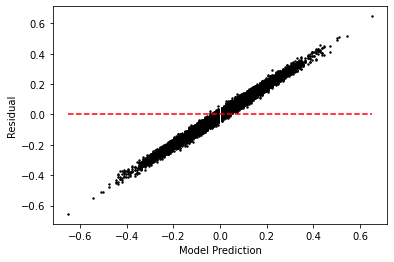

In [130]:
#Residuals calculated by definition above.
predicted_y = reg.predict(X_train)
#Note we can perform element-wise subtraction between arrays like so
residuals = y_train - predicted_y

import matplotlib.pyplot as plt
plt.scatter(y_train,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(y_train),max(y_train),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

In [131]:
print('Mean of Residuals:',residuals.mean())

Mean of Residuals: 1.202703390376177e-07


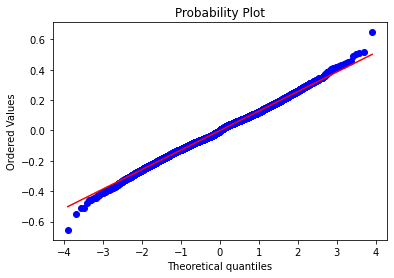

In [132]:


'''
Boilerplate code for creating a Normal Q-Q plot. The first two lines declare 
a figure and a subplot. This is an alternate way to output plots which allows 
for more than one plot per output.
'''
fig = plt.figure()
ax = fig.add_subplot(111)

'''
Scipy.Stats has a built-in function for generating this type of plot. This 
function takes three arguments: the measurement being checked (residuals), 
the distribution we are checking against (normal in this case), and the plot 
to plot it to.
'''
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

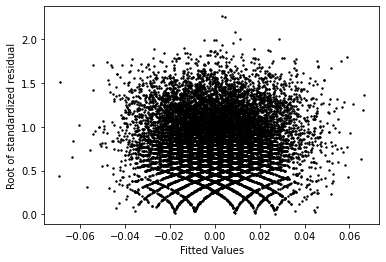

In [133]:
from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

In [110]:
corrected_model = model.get_robustcov_results(cov_type = 'HC3')
corrected_model.summary()

c:\Users\Jose Chua\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 30, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                    0.9991
Date:                Sun, 04 Aug 2024   Prob (F-statistic):              0.318
Time:                        11:50:32   Log-Likelihood:                 9963.8
No. Observations:               15717   AIC:                        -1.988e+04
Df Residuals:                   15693   BIC:                        -1.970e+04
Df Model:                          23                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.4897      6.097     -1.064      0.287     -18.440       5.461
mp                 -4.925e+10   4.93e+10     -1.000      0.318   -1.46e+11    4.73e+10
three_pct              0.0159      0.012      1.298      0.194      -0.008       0.040
orb                   -0.0500      0.034     -1.486      0.137      -0.116       0.016
tspct                 -0.1235      0.016     -7.760      0.000      -0.155      -0.092
orbpct                 6.5039      6.097      1.067      0.286      -5.448      18.456
usgpct              1.828e+07   1.83e+07      1.000      0.318   -1.76e+07    5.41e+07
orb_max                0.0009      0.012      0.081      0.935      -0.022       0.024
stlpct_max            -0.0478      0.024     -2.009      0.045      -0.094      -0.001
mp_opp              4.925e+10   4.93e+10      1.000      0.318   -4.73e+10    1.46e+11
stl_opp                0.0676      0.060      1.119      0.263      -0.051       0.186
drbpct_opp             6.5042      6.097      1.067      0.286      -5.446      18.454
stlpct_opp            -0.0280      0.060     -0.465      0.642      -0.146       0.090
usgpct_opp          1.781e+07   1.78e+07      1.000      0.318   -1.71e+07    5.27e+07
orbpct_max_opp         0.0264      0.008      3.141      0.002       0.010       0.043
tspct_10_x            -0.0084      0.037     -0.226      0.821      -0.081       0.064
usgpct_10_x         7.371e+06   7.37e+06      1.000      0.318   -7.08e+06    2.18e+07
ortg_10_x             -0.0182      0.038     -0.475      0.635      -0.094       0.057
drtg_max_10_x          0.1475      0.025      5.960      0.000       0.099       0.196
ast_opp_10_x          -0.0170      0.024     -0.696      0.486      -0.065       0.031
blkpct_opp_10_x       -0.0068      0.024     -0.283      0.777      -0.054       0.041
usgpct_opp_10_x     8.953e+06   8.96e+06      1.000      0.318    -8.6e+06    2.65e+07
ftpct_max_opp_10_x    -0.0116      0.045     -0.258      0.796      -0.100       0.076
home_next              0.0006      0.002      0.281      0.779      -0.003       0.004
usgpct_10_y          2.32e-05   2.32e-05      1.000      0.318   -2.23e-05    6.87e-05
ortg_10_y              0.0094      0.018      0.514      0.607      -0.027       0.045
ftr_max_10_y          -0.0207      0.055     -0.375      0.708      -0.129       0.088
drtg_max_10_y          0.0065      0.020      0.317      0.752      -0.034       0.047
pf_opp_10_y           -0.0220      0.021     -1.036      0.300      -0.063       0.020
usgpct_opp_10_y             0          0        nan        nan           0           0
ft_max_opp_10_y       -0.0018      0.026     -0.069      0.945      -0.052       0.049
==============================================================================
Omnibus:                       46.343   Durbin

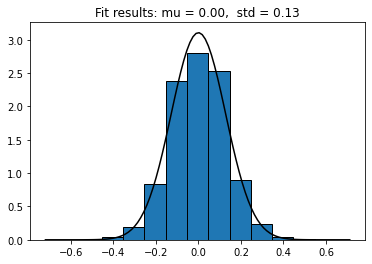

In [134]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()